# Assignment 1: 

## Perceptron and Adaline model Implementation

### Author: Gokuleshwaran Narayanan
### email: gn2244@nyu.edu

In [45]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

## 1. Load  Iris Dataset

In [46]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [47]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [48]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## 2. Data Analysis

In [50]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

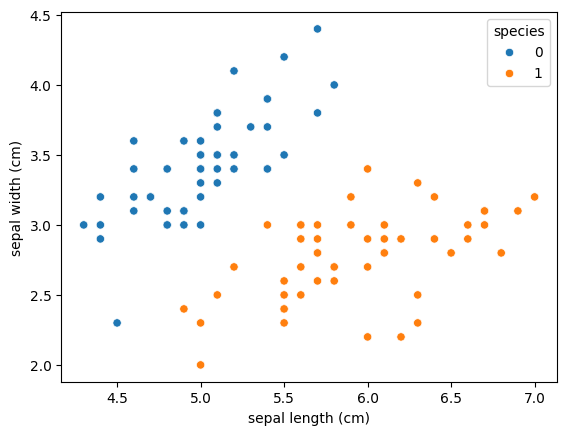

In [51]:
selected_features = ['sepal length (cm)', 'sepal width (cm)']
selected_species = [ 0, 1]
filtered_df = df[df['species'].isin(selected_species)]
sns.scatterplot(x=selected_features[0], y=selected_features[1], hue='species', data=filtered_df)


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

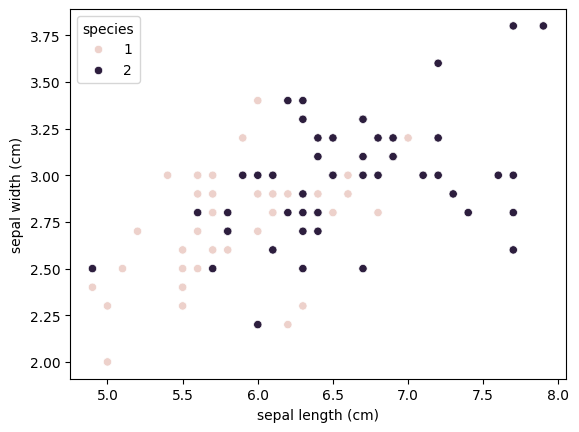

In [52]:
selected_features = ['sepal length (cm)', 'sepal width (cm)']
selected_species = [ 1, 2]
filtered_df = df[df['species'].isin(selected_species)]
sns.scatterplot(x=selected_features[0], y=selected_features[1], hue='species', data=filtered_df)

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

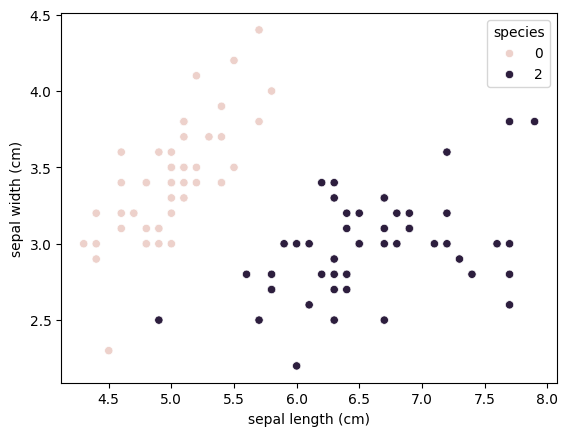

In [53]:
selected_features = ['sepal length (cm)', 'sepal width (cm)']
selected_species = [ 0, 2]
filtered_df = df[df['species'].isin(selected_species)]
sns.scatterplot(x=selected_features[0], y=selected_features[1], hue='species', data=filtered_df)

## 3. Observation: 
- species (0,1), (0,2) are linearly separable
- species (1,2) is not linearly separable


## 4. Define Perceptron Function

In [54]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [55]:
import numpy as np

def predict(x, weights):
    return np.where(np.dot(x, weights) >= 0.0, 1, -1)

In [56]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [57]:
def perceptron(X, y, learning_rate=0.0001, epochs=10):
    weights = np.zeros(X.shape[1])
    for _ in range(epochs):
        for i in range(X.shape[0]):
            if(y[i] * np.dot(X[i], weights) <= 0):
                weights += learning_rate * y[i] * X[i]
    return weights

## 5. Define Adaline Function

In [58]:
def adaline(X, y, learning_rate=0.001, epochs=10):
    weights = np.zeros(X.shape[1])

    for _ in range(epochs):
        for i in range(X.shape[0]):
            output = np.dot(X[i], weights)
            error = (y[i] - output)
            weights += learning_rate * error * X[i]

    return weights

## 6. Train Perceptron Function

In [59]:
def train_perceptron(selected_features, selected_species):
    filtered_df = df[df['species'].isin(selected_species)]
    X = filtered_df[selected_features].values
    y = np.where(filtered_df['species'] == selected_species[0], 1, -1)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    weights = perceptron(x_train, y_train)
    predictions_train = np.array([predict(x, weights) for x in x_train])
    train_acc = accuracy(y_train, predictions_train)
    predictions_test = np.array([predict(x, weights) for x in x_test])
    test_acc = accuracy(y_test, predictions_test)

    print(f"Features: {selected_features}")
    print(f"Train Accuracy: {train_acc}")
    print(f"Test Accuracy: {test_acc}")
    print("--------------------------------")
    
    plot_confusion_matrix(y_test, predictions_test, title=f'Confusion Matrix for {selected_features}')


    return train_acc, test_acc

## 7. Train Adaline Function

In [60]:
def train_adaline(selected_features, selected_species):
    filtered_df = df[df['species'].isin(selected_species)]
    X = filtered_df[selected_features].values
    y = np.where(filtered_df['species'] == selected_species[0], 1, -1)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    weights = adaline(x_train, y_train)
    predictions_train = np.array([predict(x, weights) for x in x_train])
    train_acc = accuracy(y_train, predictions_train)
    predictions_test = np.array([predict(x, weights) for x in x_test])
    test_acc = accuracy(y_test, predictions_test)

    print(f"Features: {selected_features}")
    print(f"Adaline Train Accuracy: {train_acc}")
    print(f"Adaline Test Accuracy: {test_acc}")
    print("--------------------------------")
    
    plot_confusion_matrix(y_test, predictions_test, title=f'Confusion Matrix for {selected_features}')

    return train_acc, test_acc

## 8. Perceptron Model for linearly separable

Features: ['sepal length (cm)', 'sepal width (cm)']
Train Accuracy: 0.975
Test Accuracy: 1.0
--------------------------------


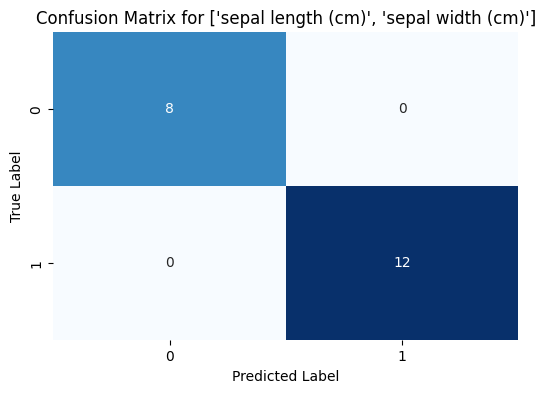

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']
Train Accuracy: 1.0
Test Accuracy: 1.0
--------------------------------


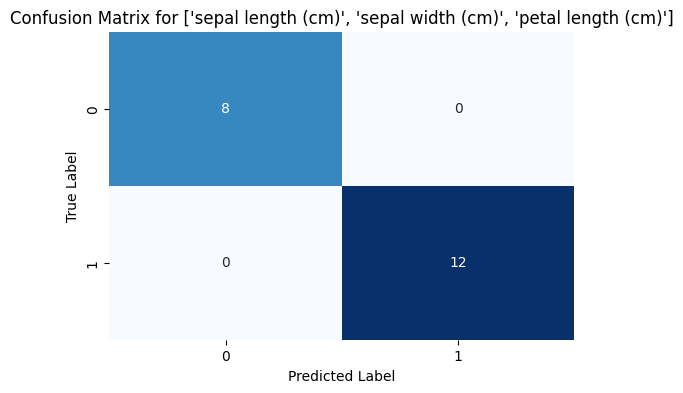

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Train Accuracy: 1.0
Test Accuracy: 1.0
--------------------------------


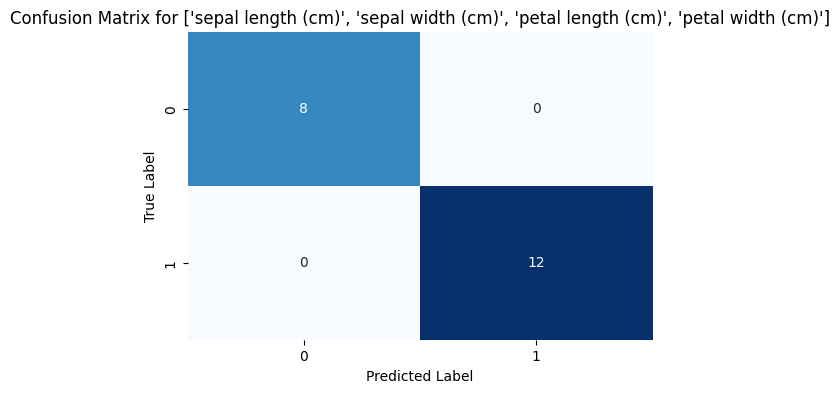

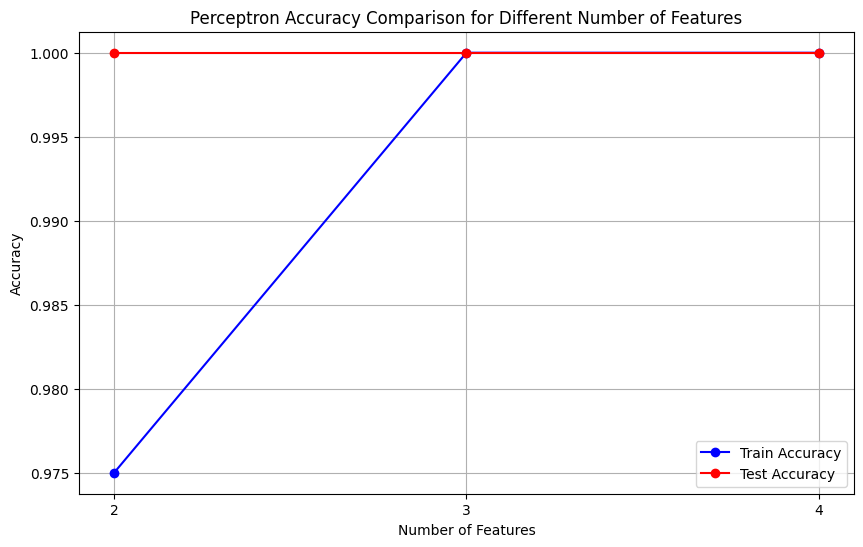

In [61]:
def plot_comparison_graph():
    features_list = [
        ['sepal length (cm)', 'sepal width (cm)'],
        ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'],
        ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
    ]

    species = [0, 1]  # species 0 and 1 are linearly separable

    train_accuracies = []
    test_accuracies = []
    num_features = [len(features) for features in features_list]

    for features in features_list:
        train_acc, test_acc = train_perceptron(features, species)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

    # Plotting
    plt.figure(figsize=(10, 6))
    
    plt.plot(num_features, train_accuracies, label='Train Accuracy', marker='o', color='b')
    plt.plot(num_features, test_accuracies, label='Test Accuracy', marker='o', color='r')

    plt.title('Perceptron Accuracy Comparison for Different Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.xticks(num_features)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_comparison_graph()


Features: ['sepal length (cm)', 'sepal width (cm)']
Train Accuracy: 0.9875
Test Accuracy: 1.0
--------------------------------


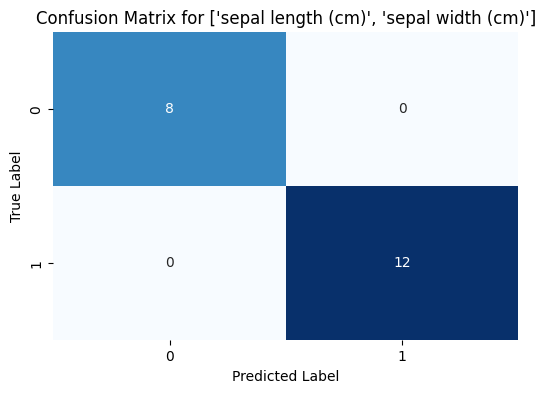

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']
Train Accuracy: 1.0
Test Accuracy: 1.0
--------------------------------


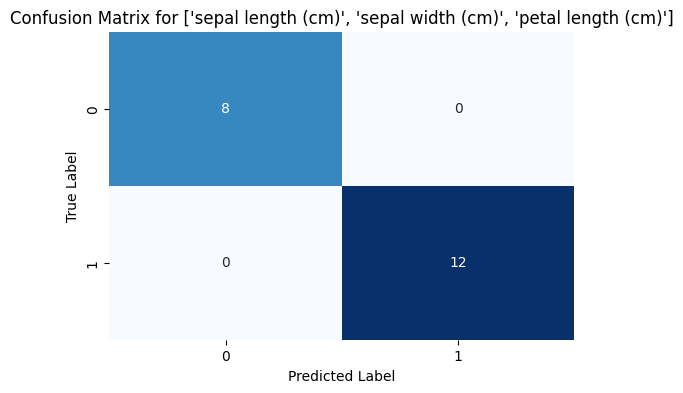

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Train Accuracy: 1.0
Test Accuracy: 1.0
--------------------------------


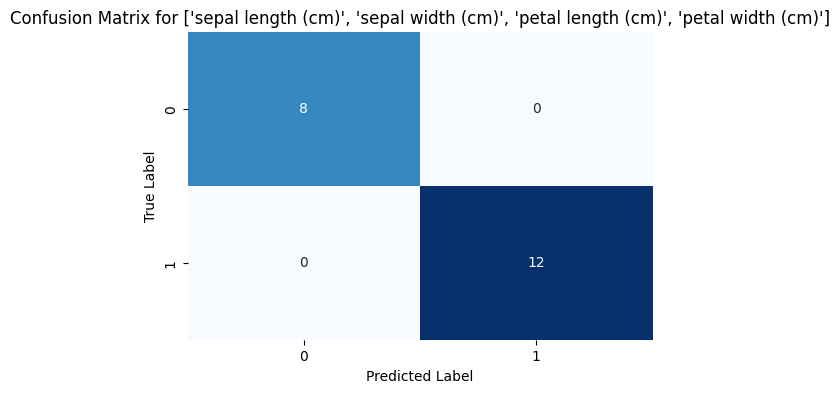

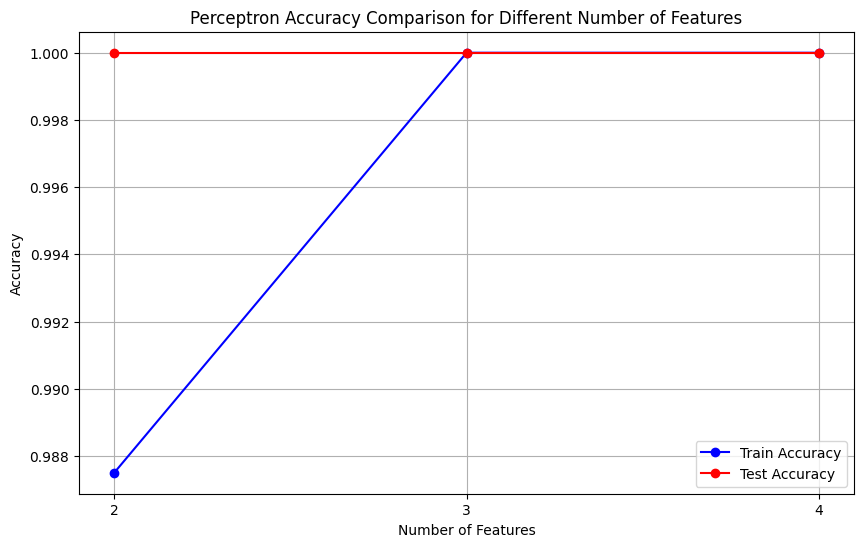

In [62]:
def plot_comparison_graph():
    features_list = [
        ['sepal length (cm)', 'sepal width (cm)'],
        ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'],
        ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
    ]

    species = [0, 2]  # species 0 and 2 are linearly separable

    train_accuracies = []
    test_accuracies = []
    num_features = [len(features) for features in features_list]

    for features in features_list:
        train_acc, test_acc = train_perceptron(features, species)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

    # Plotting
    plt.figure(figsize=(10, 6))
    
    plt.plot(num_features, train_accuracies, label='Train Accuracy', marker='o', color='b')
    plt.plot(num_features, test_accuracies, label='Test Accuracy', marker='o', color='r')

    plt.title('Perceptron Accuracy Comparison for Different Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.xticks(num_features)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_comparison_graph()


## 9. Adaline Model for linearly separable

Features: ['sepal length (cm)', 'sepal width (cm)']
Adaline Train Accuracy: 0.725
Adaline Test Accuracy: 0.6
--------------------------------


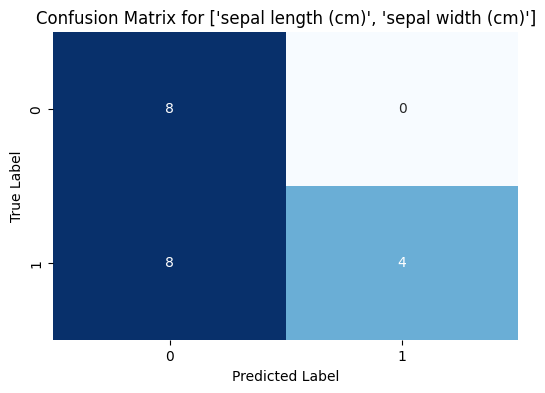

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']
Adaline Train Accuracy: 1.0
Adaline Test Accuracy: 1.0
--------------------------------


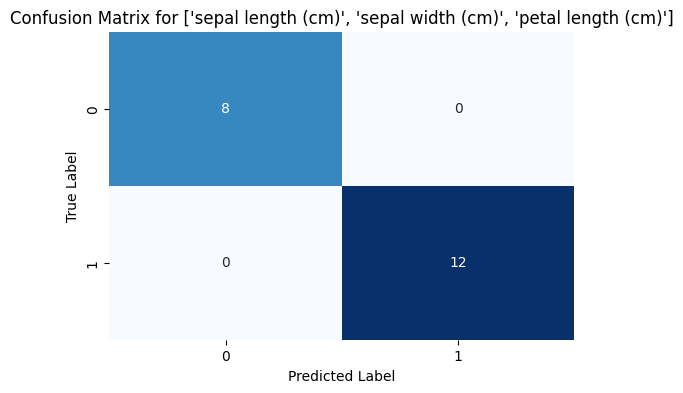

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Adaline Train Accuracy: 1.0
Adaline Test Accuracy: 1.0
--------------------------------


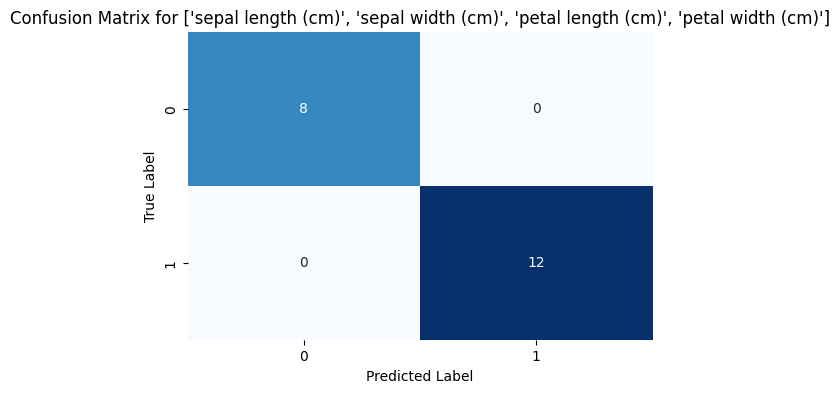

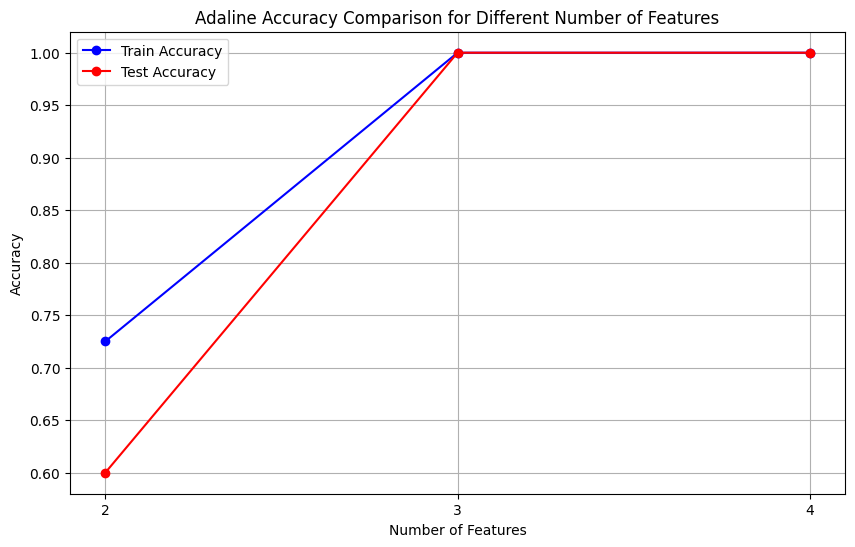

In [63]:
def plot_comparison_graph_adaline():
    features_list = [
        ['sepal length (cm)', 'sepal width (cm)'],
        ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'],
        ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
    ]

    species = [0, 1]  # species 0 and 1 are linearly separable

    train_accuracies = []
    test_accuracies = []
    num_features = [len(features) for features in features_list]

    for features in features_list:
        train_acc, test_acc = train_adaline(features, species)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

    # Plotting
    plt.figure(figsize=(10, 6))
    
    plt.plot(num_features, train_accuracies, label='Train Accuracy', marker='o', color='b')
    plt.plot(num_features, test_accuracies, label='Test Accuracy', marker='o', color='r')

    plt.title('Adaline Accuracy Comparison for Different Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.xticks(num_features)
    plt.legend()
    plt.grid(True)
    plt.show()


# Call the function to plot the comparison
plot_comparison_graph_adaline()


Features: ['sepal length (cm)', 'sepal width (cm)']
Adaline Train Accuracy: 0.7375
Adaline Test Accuracy: 0.6
--------------------------------


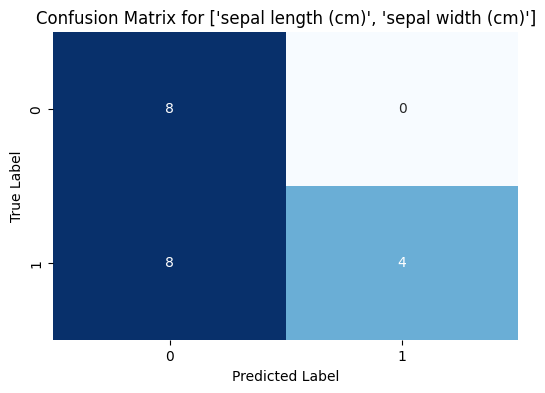

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']
Adaline Train Accuracy: 1.0
Adaline Test Accuracy: 1.0
--------------------------------


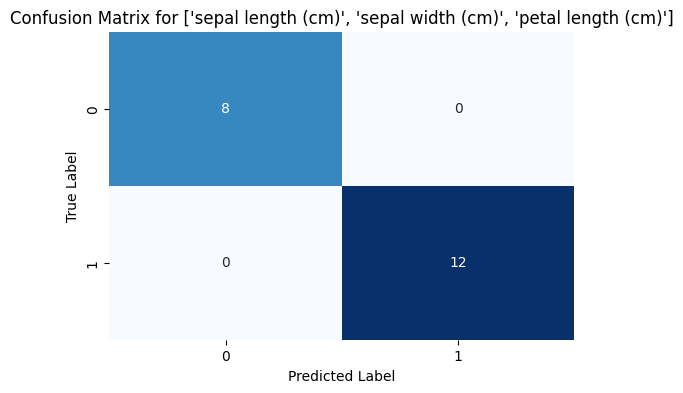

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Adaline Train Accuracy: 1.0
Adaline Test Accuracy: 1.0
--------------------------------


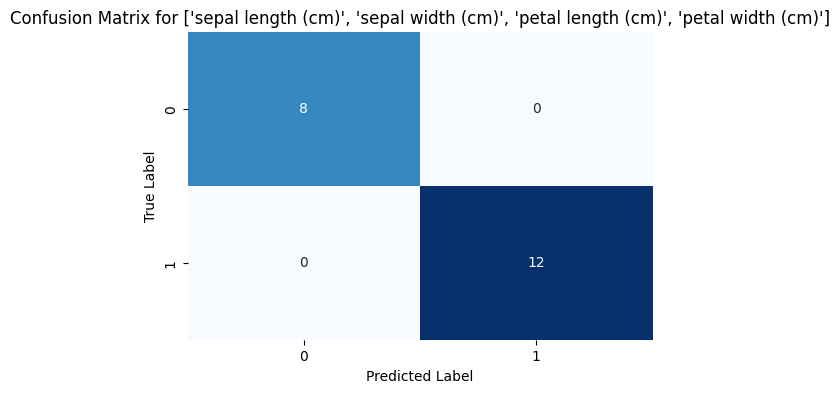

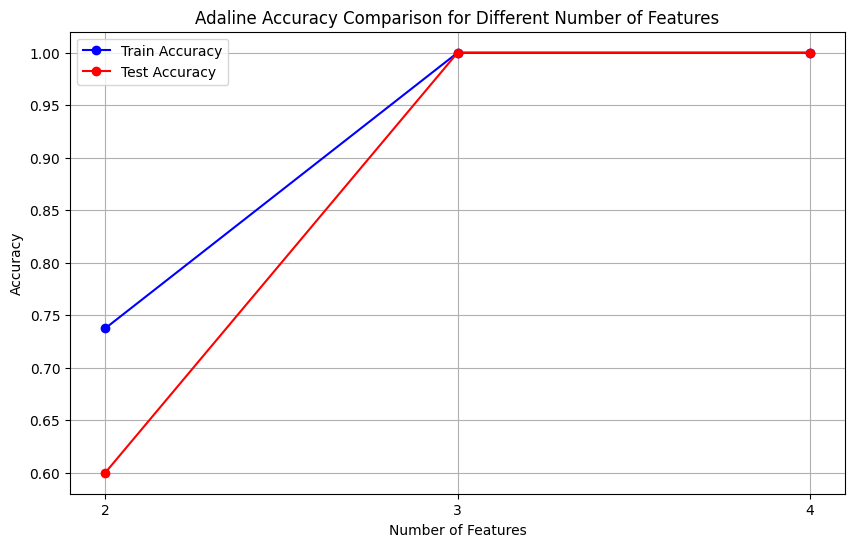

In [64]:
def plot_comparison_graph_adaline():
    features_list = [
        ['sepal length (cm)', 'sepal width (cm)'],
        ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'],
        ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
    ]

    species = [0, 2]  # species 0 and 2 are linearly separable

    train_accuracies = []
    test_accuracies = []
    num_features = [len(features) for features in features_list]

    for features in features_list:
        train_acc, test_acc = train_adaline(features, species)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

    # Plotting
    plt.figure(figsize=(10, 6))
    
    plt.plot(num_features, train_accuracies, label='Train Accuracy', marker='o', color='b')
    plt.plot(num_features, test_accuracies, label='Test Accuracy', marker='o', color='r')

    plt.title('Adaline Accuracy Comparison for Different Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.xticks(num_features)
    plt.legend()
    plt.grid(True)
    plt.show()


# Call the function to plot the comparison
plot_comparison_graph_adaline()


## 10. Perceptron Model for NOT linearly separable

Features: ['sepal length (cm)', 'sepal width (cm)']
Train Accuracy: 0.525
Test Accuracy: 0.4
--------------------------------


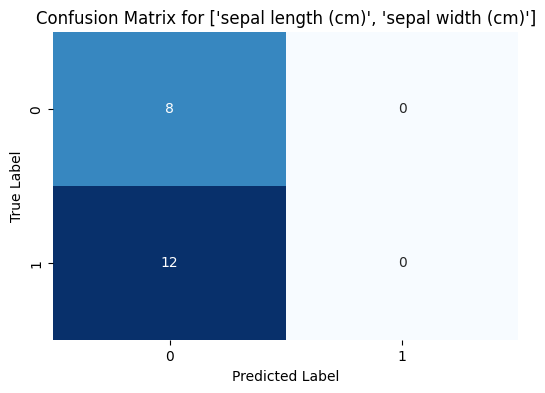

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']
Train Accuracy: 0.8375
Test Accuracy: 0.6
--------------------------------


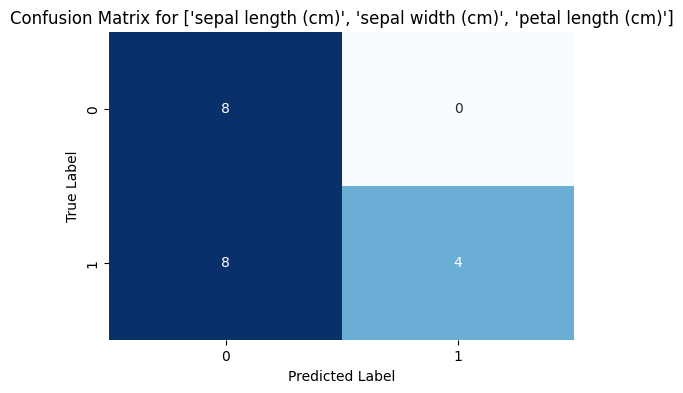

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Train Accuracy: 1.0
Test Accuracy: 0.85
--------------------------------


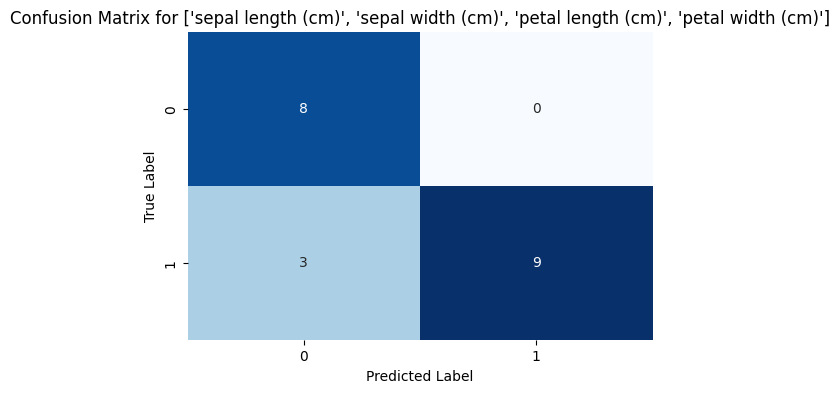

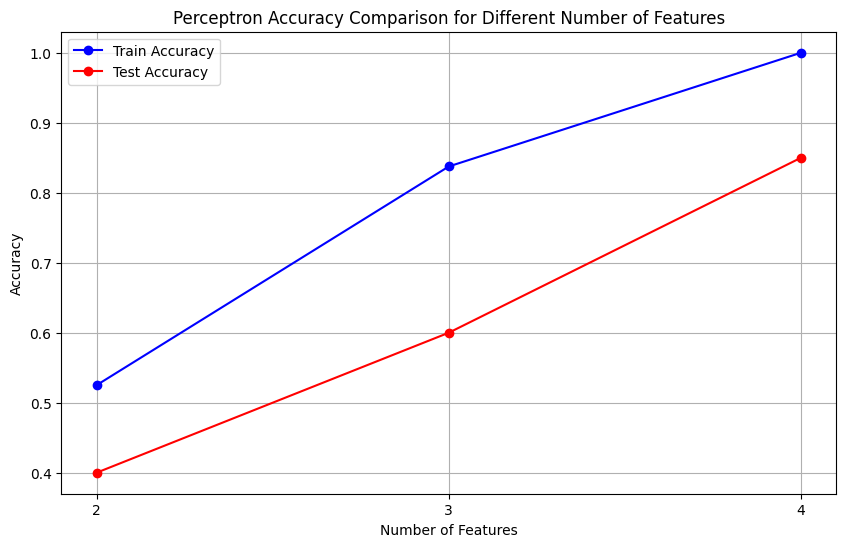

In [65]:
def plot_comparison_graph():
    features_list = [
        ['sepal length (cm)', 'sepal width (cm)'],
        ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'],
        ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
    ]

    species = [1, 2]  # species 1 and 2 are not linearly separable

    train_accuracies = []
    test_accuracies = []
    num_features = [len(features) for features in features_list]

    for features in features_list:
        train_acc, test_acc = train_perceptron(features, species)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

    # Plotting
    plt.figure(figsize=(10, 6))
    
    plt.plot(num_features, train_accuracies, label='Train Accuracy', marker='o', color='b')
    plt.plot(num_features, test_accuracies, label='Test Accuracy', marker='o', color='r')

    plt.title('Perceptron Accuracy Comparison for Different Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.xticks(num_features)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_comparison_graph()


## 11. Adaline Model for NOT linearly separable

Features: ['sepal length (cm)', 'sepal width (cm)']
Adaline Train Accuracy: 0.525
Adaline Test Accuracy: 0.4
--------------------------------


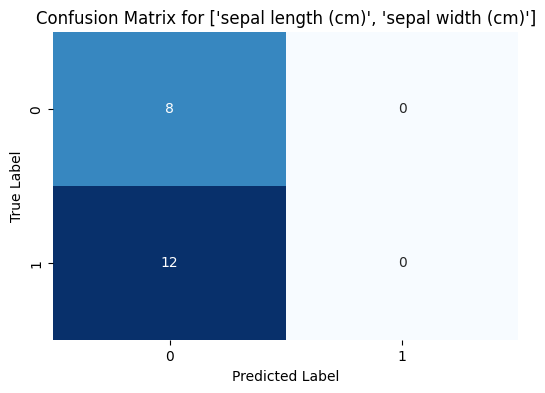

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']
Adaline Train Accuracy: 0.525
Adaline Test Accuracy: 0.4
--------------------------------


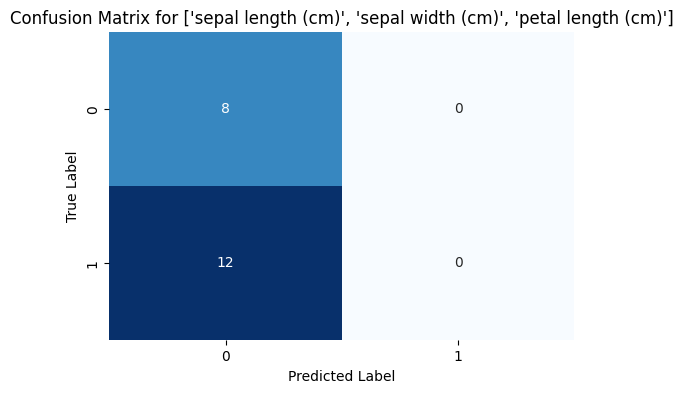

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Adaline Train Accuracy: 0.525
Adaline Test Accuracy: 0.4
--------------------------------


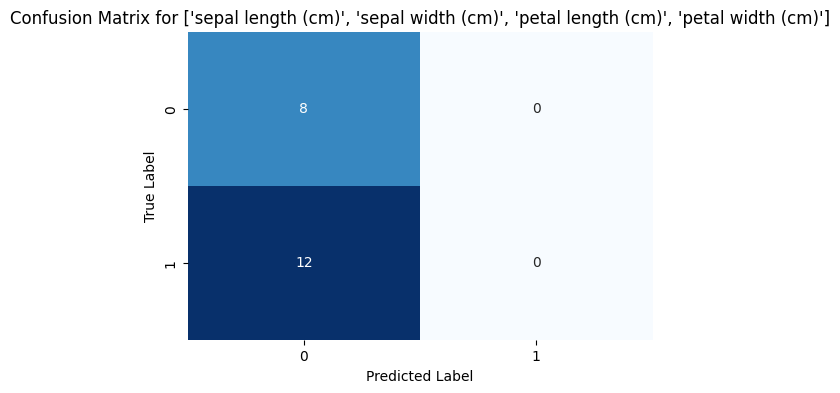

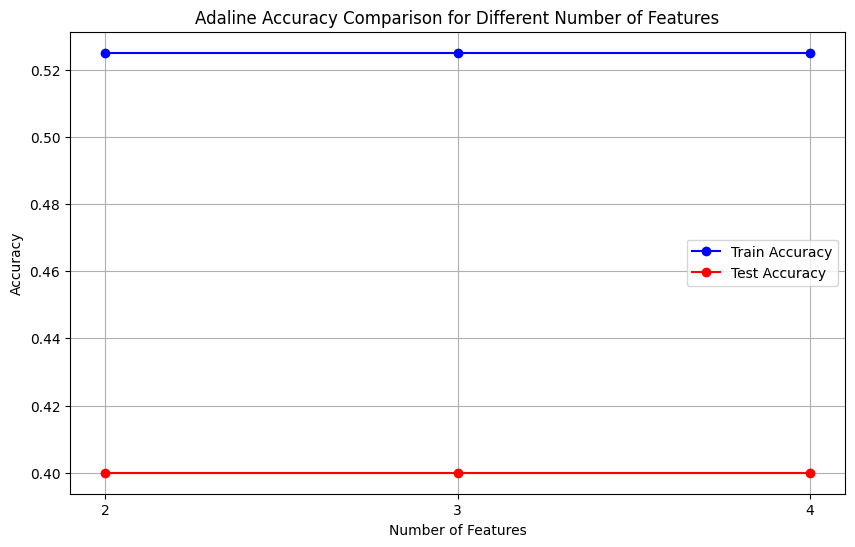

In [66]:
def plot_comparison_graph_adaline():
    features_list = [
        ['sepal length (cm)', 'sepal width (cm)'],
        ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'],
        ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
    ]

    species = [1, 2] # Species 1 and 2 are not linearly separable

    train_accuracies = []
    test_accuracies = []
    num_features = [len(features) for features in features_list]

    for features in features_list:
        train_acc, test_acc = train_adaline(features, species)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

    # Plotting
    plt.figure(figsize=(10, 6))
    
    plt.plot(num_features, train_accuracies, label='Train Accuracy', marker='o', color='b')
    plt.plot(num_features, test_accuracies, label='Test Accuracy', marker='o', color='r')

    plt.title('Adaline Accuracy Comparison for Different Number of Features')
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.xticks(num_features)
    plt.legend()
    plt.grid(True)
    plt.show()



plot_comparison_graph_adaline()
